In [1]:
%matplotlib notebook
########################################
#00     I/O  & Table S/U               #
#   a- import code.                    #
#   b- associate files to variables.   # 
#   c- read input files into df's.     #
########################################

#a
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings; warnings.simplefilter('ignore')

#b
complete_data ="data/censusdata_complete.csv"
monthly_data ="data/censusdata_monthly_sales_both.csv"
annual_data ="data/censusdata_yearly_sales_both.csv"

#c
complete_df = pd.read_csv(complete_data)
monthly_df = pd.read_csv(monthly_data)
annual_df = pd.read_csv(annual_data)
monthly_df = monthly_df.rename(columns={"ecomm sales(MIL$)": "ecomm sales", "instore sales(MIL$)": "instore sales"})
annual_df = annual_df.rename(columns={"ecomm sales(MIL$)": "ecomm sales", "instore sales(MIL$)": "instore sales"})

In [2]:
########################################################################
#01    Dataframes for graphing                                         #
#   a- create annual df up to 2019 for comparing full year data.       #
#   b- create various df's for graphing.                               # 
#   c- build df with first 5 months perchange data for last 6 years.   #
#   d- ecomm and comm df's with monthly percentage change.             #
########################################################################

#a
annual_10to19 = annual_df[annual_df["year"] < 2020]

#b
sales_15to20 = complete_df[((complete_df["year"] >= 2015) & (complete_df["year"] <= 2020)) &
                            (complete_df["dt_code"] == "SM") &  (complete_df["cat_code"] == "4541")]

perchange_15to20 = complete_df[((complete_df["year"] >= 2015) & (complete_df["year"] <= 2020)) &
                            (complete_df["dt_code"] == "MPCSM") &  (complete_df["cat_code"] == "4541")]

sales_19and20 = sales_15to20[(sales_15to20["year"] == 2019) | (sales_15to20["year"] == 2020)]

just_14 = sales_15to20[sales_15to20["year"] == 2014]
just_15 = sales_15to20[sales_15to20["year"] == 2015]
just_16 = sales_15to20[sales_15to20["year"] == 2016]
just_17 = sales_15to20[sales_15to20["year"] == 2017]
just_18 = sales_15to20[sales_15to20["year"] == 2018]
just_19 = sales_15to20[sales_15to20["year"] == 2019]
just_20 = sales_15to20[sales_15to20["year"] == 2020]


instore_1920 = complete_df[((complete_df["year"] >= 2019)) &
                         (complete_df["dt_code"] == "SM") &  (complete_df["cat_code"] == "44W72")]

just_14.reset_index(inplace=True,drop=True)
just_15.reset_index(inplace=True,drop=True)
just_16.reset_index(inplace=True,drop=True)
just_17.reset_index(inplace=True,drop=True)
just_18.reset_index(inplace=True,drop=True)
just_19.reset_index(inplace=True,drop=True)
just_20.reset_index(inplace=True,drop=True)
instore_1920.reset_index(inplace=True,drop=True)
sales_19and20.reset_index(inplace=True,drop=True)
sales_15to20.reset_index(inplace=True,drop=True)
annual_10to19.reset_index(inplace=True,drop=True)

#C
first5_perchange = perchange_15to20[(perchange_15to20["month"] == "Jan") | (perchange_15to20["month"] == "Feb") |
                                    (perchange_15to20["month"] == "Mar") | (perchange_15to20["month"] == "Apr") |
                                    (perchange_15to20["month"] == "May")]
first5_perchange.reset_index(inplace=True,drop=True)

first5_Jan = first5_perchange[first5_perchange["month"] == "Jan"]
first5_Feb = first5_perchange[first5_perchange["month"] == "Feb"]
first5_Mar = first5_perchange[first5_perchange["month"] == "Mar"]
first5_Apr = first5_perchange[first5_perchange["month"] == "Apr"]
first5_May = first5_perchange[first5_perchange["month"] == "May"]
first5_Jan.reset_index(inplace=True,drop=True)
first5_Feb.reset_index(inplace=True,drop=True)
first5_Mar.reset_index(inplace=True,drop=True)
first5_Apr.reset_index(inplace=True,drop=True)
first5_May.reset_index(inplace=True,drop=True)

years = ("2015", "2016", "2017", "2018", "2019", "2020")
first5_delta = pd.DataFrame({"year": years, "Jan": first5_Jan["amount"], "Feb": first5_Feb["amount"],
                            "Mar": first5_Mar["amount"], "Apr": first5_Apr["amount"], "May": first5_May["amount"]})
first5_delta.to_csv("Data/monthlyperchange_1520_JanMay.csv",index=False,header=True)
#e
ecomm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "4541")]
ecomm_perchange.reset_index(inplace=True,drop=True)

comm_perchange = complete_df[(complete_df["dt_code"] == "MPCSM") & (complete_df["cat_code"] == "44W72")]
comm_perchange.reset_index(inplace=True,drop=True)

####  Section 10:   Monthly and Annual Sales graphing for Ecomm and In Store   ###

<IPython.core.display.Javascript object>


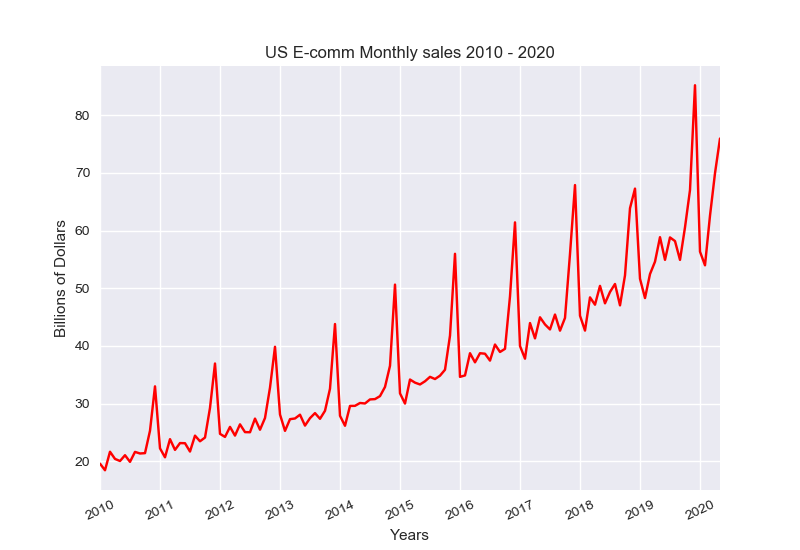

In [3]:
######################################################
#10.1  Line graph Monthly Sales 2010-2020 Ecomm      #
#   - change units from millions to billions.        #
######################################################

line_x = monthly_df.index
line_y = monthly_df["ecomm sales"] / 1000
line_xticks = monthly_df["year"].unique()
line_xlabel = "Years"
line_ylabel = "Billions of Dollars"
line_title = "US E-comm Monthly sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="r")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_monthly_sales.png")

<IPython.core.display.Javascript object>


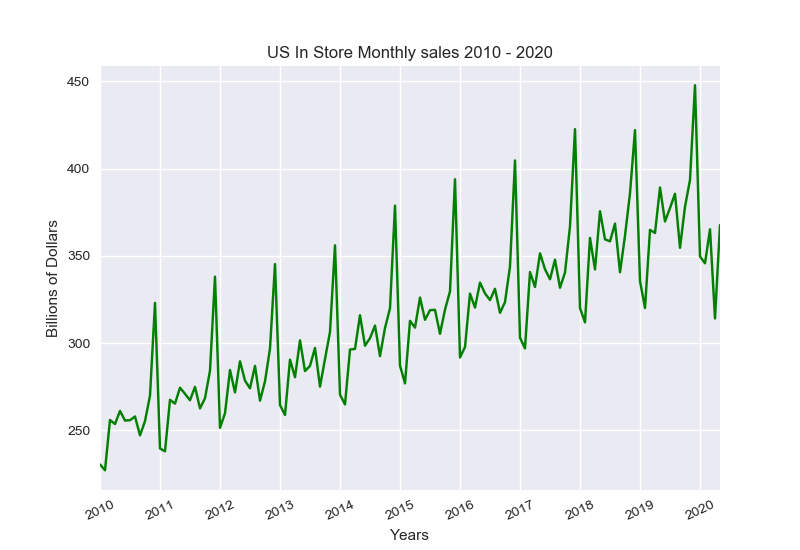

In [4]:
######################################################
#10.2  Line graph Monthly Sales 2010-2020 In Store   #
#   - change units from millions to billions.        #
######################################################

line_x = monthly_df.index
line_y = monthly_df["instore sales"] / 1000
line_xticks = monthly_df["year"].unique()
line_xlabel = "Years"
line_ylabel = "Billions of Dollars"
line_title = "US In Store Monthly sales 2010 - 2020"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="g")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_instore_tenyear_monthly_sales.png")

<IPython.core.display.Javascript object>


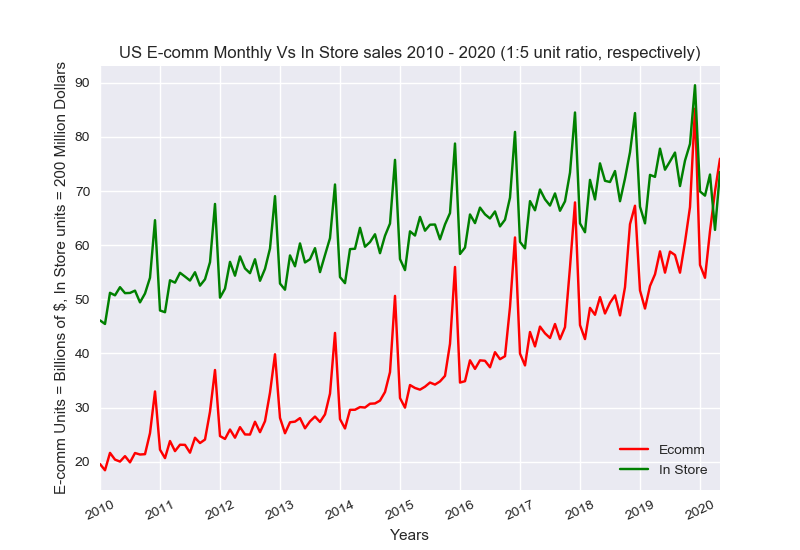

In [5]:
######################################################
#10.3  Line graph Monthly Sales 2010-2020            #
#   - overlay ecomm and instore (at 20%) sales.      #
######################################################

line_x = monthly_df.index
line_y = monthly_df["ecomm sales"] / 1000
line_xticks = monthly_df["year"].unique()
line_xlabel = "Years"
line_ylabel = "E-comm Units = Billions of $, In Store units = 200 Million Dollars"
line_title = "US E-comm Monthly Vs In Store sales 2010 - 2020 (1:5 unit ratio, respectively)"

plt.style.use("seaborn")
plt.figure()
ecomm103, = plt.plot(line_x, line_y,color="r", label = "Ecomm")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()


line_x = monthly_df.index
line_y = monthly_df["instore sales"] / 5000    #  units now in 200M$

plt.style.use("seaborn")
comm103, = plt.plot(line_x, line_y,color="g", label="In Store")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.legend(loc="lower right")

plt.show()
plt.savefig("Data/USCensus_joint_tenyear_monthly_sales.png")


  The above graph shows In-store sales in units of 200 million dollars, and E-commerce sales in units of billions of dollars.  We can see the percent of market share held by E-commerce roughly doubling in the past 10 years.  looking at the start of year 2010, E-comm was about 20 billion and 1/5th of In-store, about 46 billion. Multiplying the approximate 2:1 ratio shown in the chart by the 5:1 ratio in units, we see E-comm had about 1/10th the sales that In-store had and about 1/15th of total sales, roughly 7% (actual value is 7.82%).
  Comparing this to January 2020, we see E-comm sales about 50 billion and In-store, about 350 billion (~70 * 5). We see E-comm sales climbing to 1/7th that of In-store and about 1/8th total sales, 12.5% (actual numbers 56:350, 13.88%).
  We can see the growth of E-commerce market share has steadily been on the rise, nearly doubling in the past 10 years. Also, the December 2019 peaks on the chart are nearly eqaul, meaning E-com holiday sales were nearly 1/6th of the total(16.67%)(actual share was 15.99%, this was the largest share to date, beating the previous high by more than 1 1/2 points).  
  With reported sales through May, we see 2020 start off normally, for both E-comm and In-store, with a large drop in sales from the end of the previous year's holiday sales.  However, with the onset of COVID-19 in the United States, In-store sales continued to drop and E-comm sales increased, peaking in April with a record market share of 18.21%. 

<IPython.core.display.Javascript object>


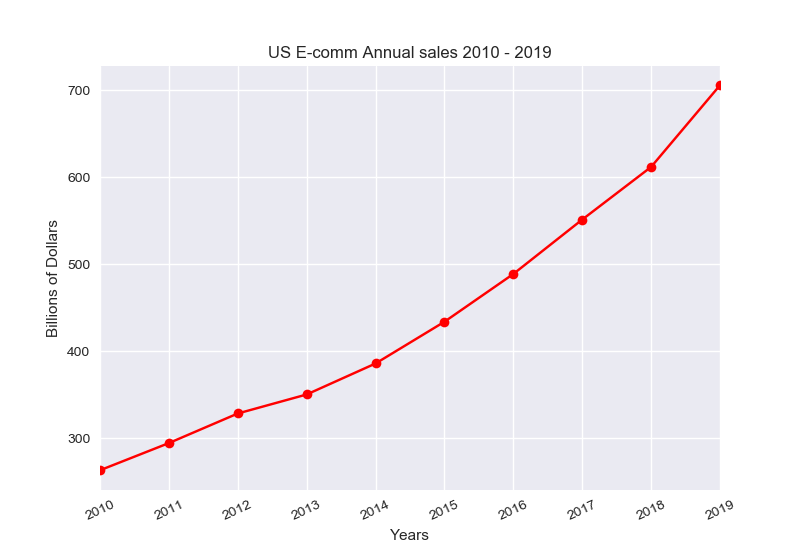

In [6]:
######################################################
#10.4  Line graph Annual Sales 2010-2019 Ecomm       #
#   - change units from millions to billions.        #
######################################################

line_x = annual_10to19["year"]
line_y = annual_10to19["ecomm sales"] / 1000
line_xticks = annual_10to19["year"].unique()
line_ylabel = "Billions of Dollars"
line_xlabel = "Years"
line_title = "US E-comm Annual sales 2010 - 2019"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="r", marker ='o')
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_annual_sales.png")

<IPython.core.display.Javascript object>


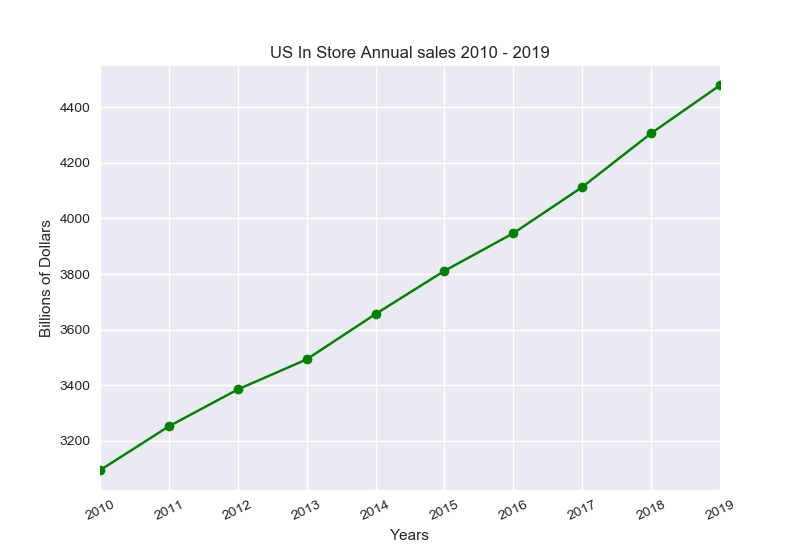

In [7]:
#####################################################
#10.5  Line graph Annual Sales 2010-2019 In Store   #
#   - change units from millions to billions.       #
#####################################################

line_x = annual_10to19["year"]
line_y = annual_10to19["instore sales"] / 1000
line_xticks = annual_10to19["year"].unique()
line_xlabel = "Years"
line_ylabel = "Billions of Dollars"
line_title = "US In Store Annual sales 2010 - 2019"

plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="g", marker="o")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(rotation=25)

plt.show()
plt.savefig("Data/USCensus_instore_tenyear_annual_sales.png")

####  Section 20:   Monthly Percent Change graphing for Ecomm and In Store   ###

<IPython.core.display.Javascript object>


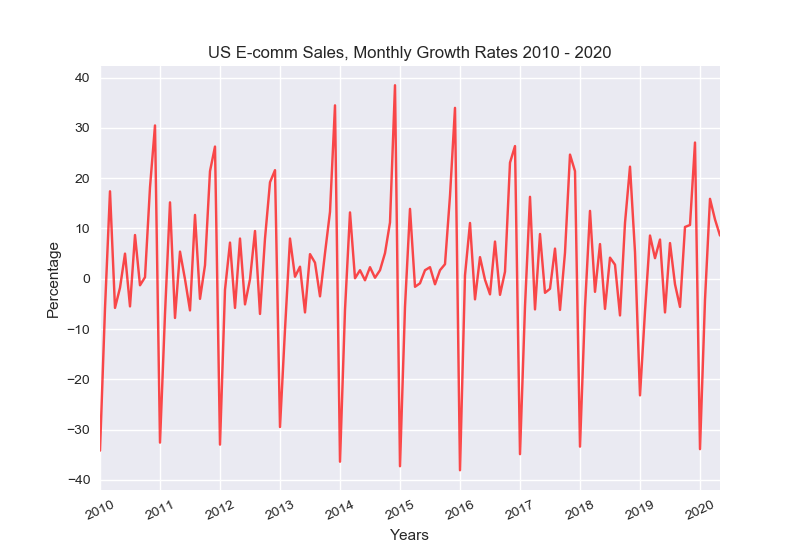

In [8]:
##############################################################
#20.1  line Graph  perchange Ten Year Monthly ecomm          #
##############################################################

line_x = ecomm_perchange.index
line_y = ecomm_perchange["amount"]
line_xticks = ecomm_perchange["year"].unique()
line_xlabel = "Years"
line_ylabel = "Percentage"
line_title = "US E-comm Sales, Monthly Growth Rates 2010 - 2020"
plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="red",alpha=.7)

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_monthly_growth.png")

<IPython.core.display.Javascript object>


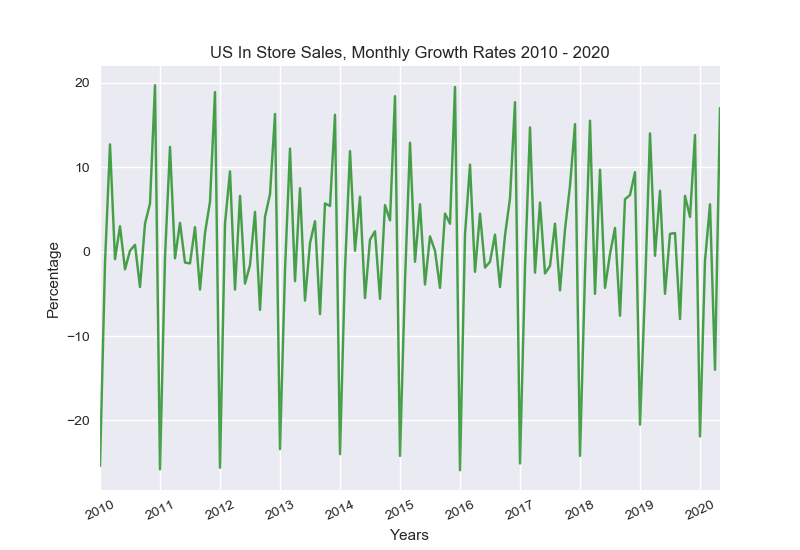

In [9]:
##############################################################
#20.2  line Graph  perchange Ten Year Monthly InStore        #
##############################################################

line_x = comm_perchange.index
line_y = comm_perchange["amount"]
line_xticks = comm_perchange["year"].unique()
line_xlabel = "Years"
line_ylabel = "Percentage"
line_title = "US In Store Sales, Monthly Growth Rates 2010 - 2020"
plt.style.use("seaborn")
plt.figure()
plt.plot(line_x, line_y,color="g",alpha=.7)

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_x[::12], line_xticks, rotation=25)

plt.show()
plt.savefig("Data/USCensus_instore_tenyear_monthly_growth.png")

<IPython.core.display.Javascript object>


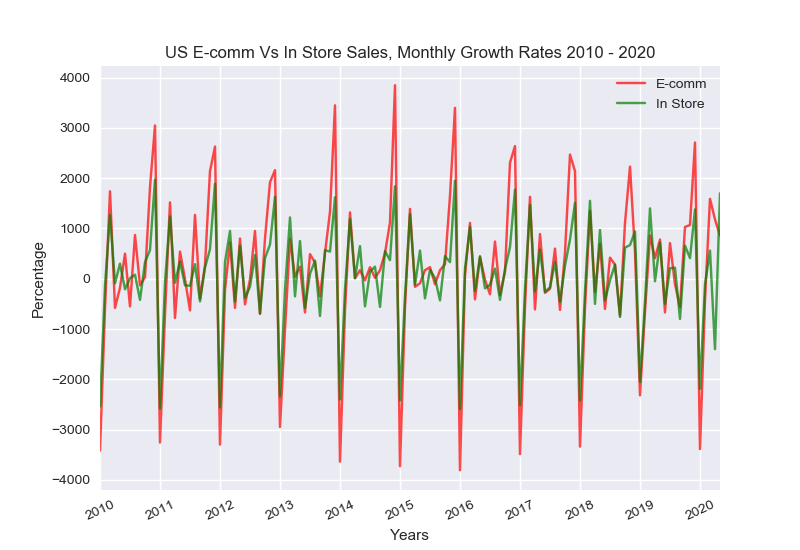

In [16]:
#################################################################
#20.3  line Graph  perchange Ten Year Monthly ecomm & Instore   #
#################################################################

line_xe = ecomm_perchange.index
line_ye = ecomm_perchange["amount"] *100
line_xticks = ecomm_perchange["year"].unique()
line_ylabel = "Percentage"
line_xlabel = "Years"
line_title = "US E-comm Vs In Store Sales, Monthly Growth Rates 2010 - 2020"
plt.style.use("seaborn")
plt.figure()
ecom203, = plt.plot(line_xe, line_ye,color="r",alpha=.7, label = "E-comm")

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_xe[::12], line_xticks, rotation=25)

plt.show()

line_xc = comm_perchange.index
line_yc = comm_perchange["amount"] *100
com203, = plt.plot(line_xc, line_yc,color="g",alpha=.7,label="In Store")
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(line_xc[::12], line_xticks, rotation=25)
plt.legend(loc="upper right")


plt.savefig("Data/USCensus_joint_tenyear_monthly_growth.png")

####  Section 30:   Ecomm Percentage of Total Retail   graphing   ###

<IPython.core.display.Javascript object>


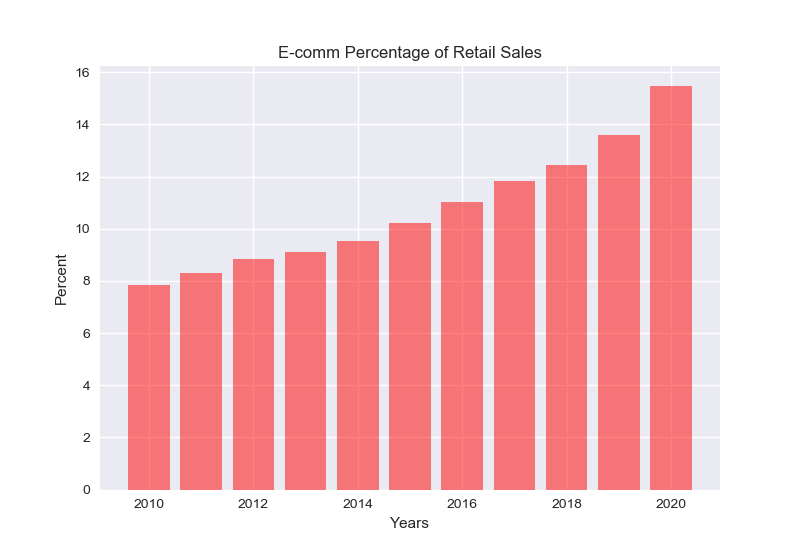

In [11]:
##############################################################
#30.1   bar graph percentage of Annual Ecomm Sales 2010-20   #
##############################################################

xaxis = annual_df["year"]
yaxis = annual_df["ecomm %"]
plt.figure()
plt.title("E-comm Percentage of Retail Sales")
plt.xlabel("Years")
plt.ylabel("Percent")

plt.bar(xaxis, yaxis, alpha=0.5, align="center",color=("r"))
plt.show()
plt.savefig("Data/USCensus_ecomm_tenyear_percentage.png")

<IPython.core.display.Javascript object>


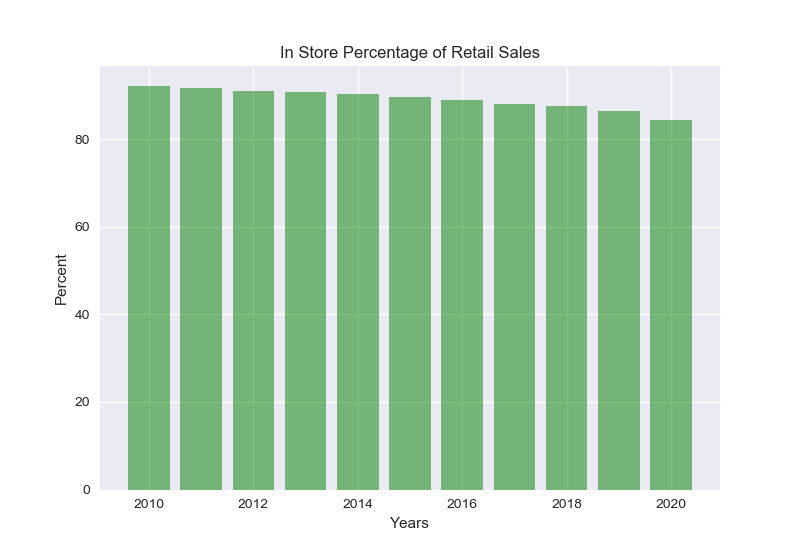

In [12]:
################################################################
#30.2   bar graph percentage of Annual InStore Sales 2010-20   #
################################################################

inper = round((annual_df["instore sales"] / annual_df["total sales"]) * 100,2)

xaxis = annual_df["year"]
yaxis = inper
plt.figure()
plt.title("In Store Percentage of Retail Sales")
plt.xlabel("Years")
plt.ylabel("Percent")

plt.bar(xaxis, yaxis, alpha=0.5, align="center",color=("g"))
plt.show()
plt.savefig("Data/USCensus_instore_tenyear_percentage.png")

<IPython.core.display.Javascript object>


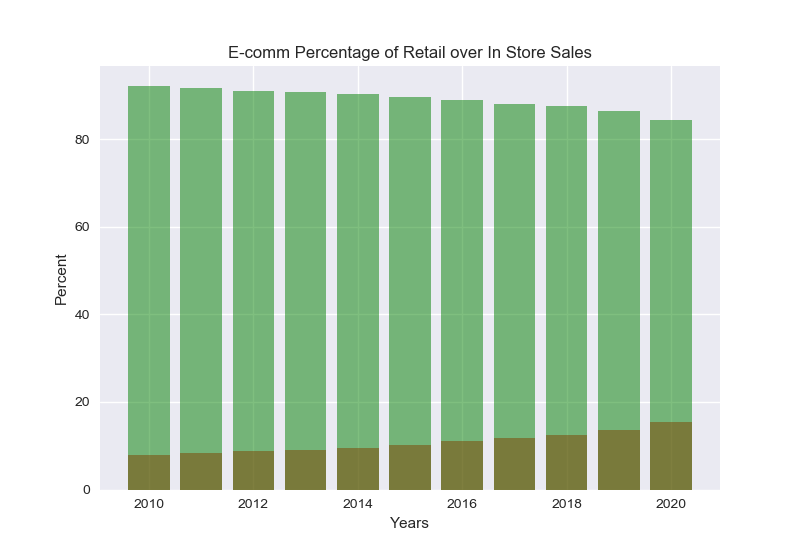

In [19]:
###########################################################################
#30.3   bar graph percentage of Annual Ecomm over InStore Sales 2010-20   #
###########################################################################

xaxise = annual_df["year"]
yaxise = annual_df["ecomm %"]
plt.figure()

plt.bar(xaxise, yaxise, alpha=0.5, align="center",color=("r"))
plt.show()


inper = round((annual_df["instore sales"] / annual_df["total sales"]) * 100,2)
plt.title("E-comm Percentage of Retail over In Store Sales")
plt.xlabel("Years")
plt.ylabel("Percent")

xaxisc = annual_df["year"]
yaxisc = inper
plt.bar(xaxisc, yaxisc, alpha=0.5, align="center",color=("g"),)
plt.show()
plt.savefig("Data/USCensus_ecomm_over_com_tenyear_percentage.png")

####  Section 40:   Show  COVID  Effect graphing   ###

<IPython.core.display.Javascript object>


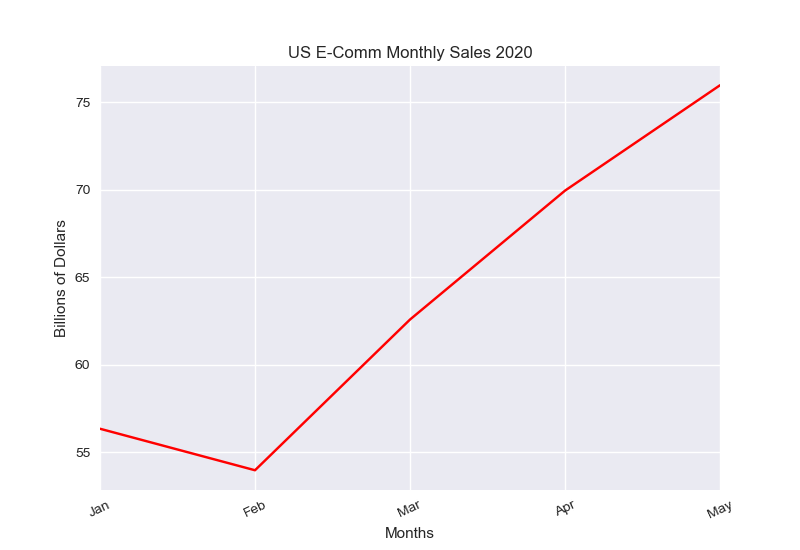

In [20]:
#########################################
#40.1  2020 graph Monthly Ecomm Sales   #
#########################################

line_x = just_20["month"]
line_y = just_20["amount"] / 1000
plt.figure()
line_xlabel = "Months"
line_ylabel = "Billions of Dollars"
line_title = "US E-Comm Monthly Sales 2020"

plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xticks(rotation=25)
plt.style.use("seaborn")
plt.plot(line_x, line_y,color="red")
plt.xlim(line_x[0], line_x[len(line_x)-1])

plt.show()
plt.savefig("Data/USCensus_ecomm_2020_monthly_sales.png")

<IPython.core.display.Javascript object>


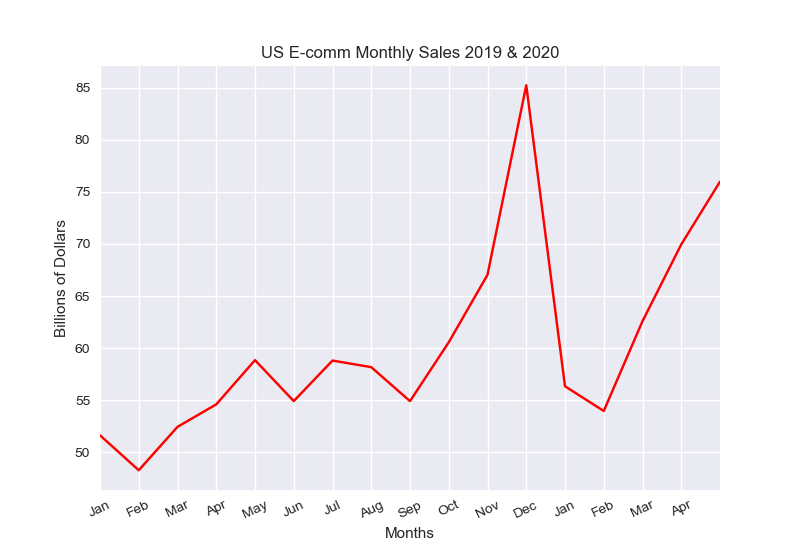

In [21]:
##################################################
#40.2  2019 and 2020  graph Monthly Ecomm Sales  #
##################################################

tickmarks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ticknames = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May" ]
line_x = sales_19and20.index
line_y = sales_19and20["amount"] / 1000
plt.figure()
line_ylabel = "Billions of Dollars"
line_xlabel = "Months"
line_title = "US E-comm Monthly Sales 2019 & 2020"
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.style.use("seaborn")
plt.plot(line_x, line_y,color="red")
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(tickmarks, ticknames, rotation=25)
plt.show()
plt.savefig("Data/USCensus_ecomm_201920_monthly_sales.png")

<IPython.core.display.Javascript object>


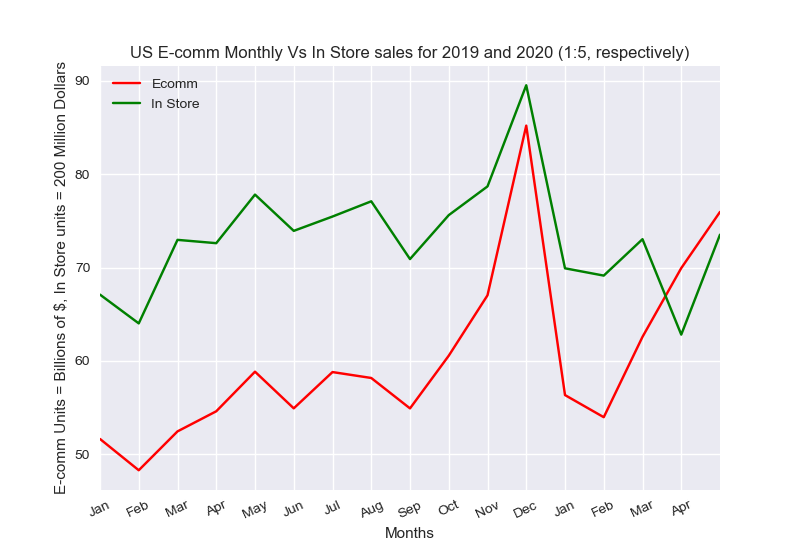

In [24]:
############################################################
#40.2  2019 an 2020  graph Monthly Ecomm Sales Vs Instore  #
############################################################

tickmarks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ticknames = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May" ]

line_x = sales_19and20.index
line_y = sales_19and20["amount"] / 1000
line_xlabel = "Months"
line_ylabel = "E-comm Units = Billions of $, In Store units = 200 Million Dollars"
line_title = "US E-comm Monthly Vs In Store sales for 2019 and 2020 (1:5, respectively)"

plt.style.use("seaborn")
plt.figure()
ecomm402, = plt.plot(line_x, line_y,color="r", label = "Ecomm")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(tickmarks, ticknames, rotation=25)
plt.show()

line_x = instore_1920.index
line_y = instore_1920["amount"] / 5000    #  units now in 200M$
plt.style.use("seaborn")
comm402, = plt.plot(line_x, line_y,color="g", label="In Store")
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
plt.xlim(line_x[0], line_x[len(line_x)-1])
plt.xticks(tickmarks, ticknames, rotation=25)
plt.legend(loc="upper left")

plt.show()
plt.savefig("Data/USCensus_joint_201920_monthly_sales.png")


<IPython.core.display.Javascript object>


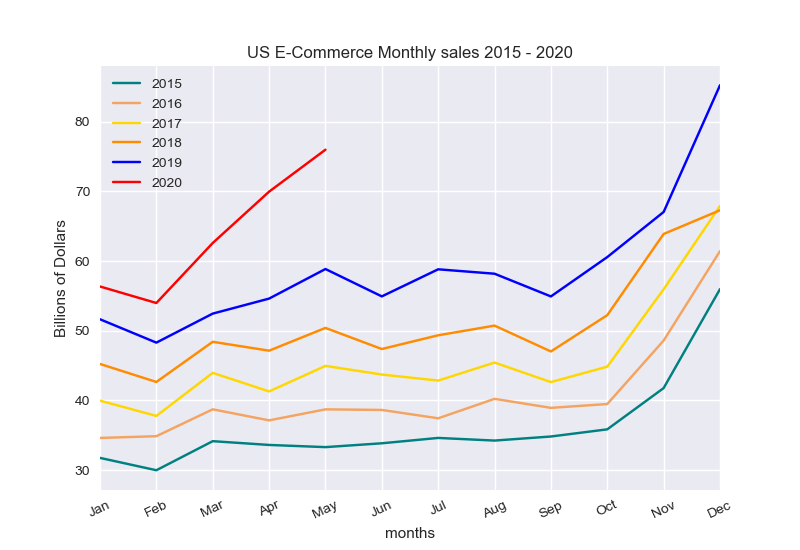

In [30]:
####################
#40.3  Overlay Lines of Monthly Sales
####################################

#2015
line_x5 = just_15["month"]
line_y5 = just_15["amount"] / 1000
plt.figure()
line_xlabel = "months"
line_ylabel = "Billions of Dollars"
line_title = "US E-Commerce Monthly sales 2015 - 2020"
plt.title(line_title)
plt.xlabel(line_xlabel)
plt.ylabel(line_ylabel)
ecomm15, = plt.plot(line_x5, line_y5,color="teal",label=2015)

plt.xticks(rotation=25)
plt.style.use("seaborn")
plt.xlim(line_x9[0], line_x9[len(line_x9)-1])


#2016
line_x6 = just_16["month"]
line_y6 = just_16["amount"] / 1000
ecomm16, = plt.plot(line_x6, line_y6,color="sandybrown",label="2016")


#2017
line_x7 = just_17["month"]
line_y7 = just_17["amount"] / 1000
ecomm17, = plt.plot(line_x7, line_y7,color="gold",label="2017")

#2018
line_x8 = just_18["month"]
line_y8 = just_18["amount"] / 1000
ecomm18, = plt.plot(line_x8, line_y8,color="darkorange",label="2018")

#2019
line_x9 = just_19["month"]
line_y9 = just_19["amount"] / 1000
ecomm9, = plt.plot(line_x9, line_y9,color="b",label="2019")

#2020
line_x2 = just_20["month"]
line_y2 = just_20["amount"] / 1000
ecomm20, = plt.plot(line_x2, line_y2,color="r", label="2020")
plt.legend(loc="upper left")

plt.savefig("Data/USCensus_ecomm_2020_monthly_sales_15to20.png")